In [38]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [39]:
pwd

'/Users/adityarudraksha/Desktop/Data Mining /Assignment 2'

In [40]:
ls

Asn2_WineQT_all.csv
CS 57300_ Data Mining - Assignment 2.pdf
HW_2_Answers.docx
HW_2_Answers.pdf
Question 5.ipynb


In [41]:
data = pd.read_csv('/Users/adityarudraksha/Desktop/Data Mining /Assignment 2/Asn2_WineQT_all.csv')

In [42]:
data

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1596,8.6,0.806,0.19,5.4,0.096,-6.7,89.4,0.99791,3.43,0.83,11.5,5
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,1598,NaN,0.593,0.30,1.8,0.103,9.8,74.7,0.99647,3.40,0.64,9.6,6


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1600 non-null   int64  
 1   fixed acidity         1521 non-null   float64
 2   volatile acidity      1523 non-null   float64
 3   citric acid           1526 non-null   float64
 4   residual sugar        1527 non-null   float64
 5   chlorides             1511 non-null   float64
 6   free sulfur dioxide   1510 non-null   float64
 7   total sulfur dioxide  1523 non-null   float64
 8   density               1527 non-null   float64
 9   pH                    1600 non-null   float64
 10  sulphates             1526 non-null   float64
 11  alcohol               1543 non-null   float64
 12  quality               1600 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 162.6 KB


In [44]:
data.describe()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1600.00000,1521.000000,1523.000000,1526.000000,1527.000000,1511.000000,1510.000000,1523.000000,1527.000000,1600.000000,1526.000000,1543.000000,1600.000000
mean,799.50000,8.348192,0.536206,0.265714,2.530812,0.086982,15.277881,45.678464,0.996752,3.264956,0.659764,10.475070,5.657500
std,462.02453,1.779717,0.180523,0.197034,1.374316,0.047185,10.336340,32.420931,0.001908,0.402976,0.170640,1.094904,0.810465
min,0.00000,3.000000,0.010000,-0.300000,-1.800000,-0.043000,-15.500000,-42.600000,0.990070,1.500000,0.230000,7.700000,3.000000
25%,399.75000,7.100000,0.400000,0.100000,1.900000,0.068000,7.000000,22.000000,0.995555,3.190000,0.550000,9.600000,5.000000
50%,799.50000,8.000000,0.532000,0.260000,2.200000,0.080000,13.500000,40.000000,0.996740,3.300000,0.630000,10.300000,6.000000
75%,1199.25000,9.300000,0.645000,0.410000,2.800000,0.095000,21.000000,63.100000,0.997895,3.400000,0.740000,11.200000,6.000000
max,1599.00000,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,5.500000,2.000000,14.900000,8.000000


In [45]:
# Displaying the features that have null values
data.isna().sum()

Id                       0
fixed acidity           79
volatile acidity        77
citric acid             74
residual sugar          73
chlorides               89
free sulfur dioxide     90
total sulfur dioxide    77
density                 73
pH                       0
sulphates               74
alcohol                 57
quality                  0
dtype: int64

# Data Preprocessing

In [46]:
dt_copy = data.copy()
a = dt_copy.dropna()
dt_copy = a
dt_copy.isna().sum()

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [47]:
dt_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1323 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    1323 non-null   int64  
 1   fixed acidity         1323 non-null   float64
 2   volatile acidity      1323 non-null   float64
 3   citric acid           1323 non-null   float64
 4   residual sugar        1323 non-null   float64
 5   chlorides             1323 non-null   float64
 6   free sulfur dioxide   1323 non-null   float64
 7   total sulfur dioxide  1323 non-null   float64
 8   density               1323 non-null   float64
 9   pH                    1323 non-null   float64
 10  sulphates             1323 non-null   float64
 11  alcohol               1323 non-null   float64
 12  quality               1323 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 144.7 KB


In [48]:
dt_copy.shape

(1323, 13)

In [49]:
dt_copy

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,1596,8.6,0.806,0.19,5.4,0.096,-6.7,89.4,0.99791,3.43,0.83,11.5,5
1597,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [50]:
(dt_copy['fixed acidity'] < 0).sum()

0

In [51]:
(dt_copy['citric acid'] < 0).sum()

39

In [52]:
(dt_copy['residual sugar'] < 0).sum()

15

In [53]:
(dt_copy['chlorides'] < 0).sum()

11

In [54]:
(dt_copy['volatile acidity'] < 0).sum()

0

In [55]:
(dt_copy['free sulfur dioxide'] < 0).sum()

36

In [56]:
(dt_copy['total sulfur dioxide'] < 0).sum()

35

In [57]:
(dt_copy['density'] < 0).sum()

0

In [58]:
(dt_copy['pH'] > 14).sum()

0

In [59]:
(dt_copy['sulphates'] < 0).sum()

0

In [60]:
(dt_copy['alcohol'] < 0).sum()

0

In [61]:
dt_copy.drop(dt_copy[dt_copy['fixed acidity'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['volatile acidity'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['citric acid'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['residual sugar'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['chlorides'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['free sulfur dioxide'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['total sulfur dioxide'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['density'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['pH'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['pH'] > 14].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['sulphates'] < 0].index, inplace = True)
dt_copy.drop(dt_copy[dt_copy['alcohol'] < 0].index, inplace = True)

In [62]:
dt_copy

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [63]:
# Remove instances where pH values are less than 2.6 and greater than 4.4

bool_series = (dt_copy['pH'] >= 2.6) & (dt_copy['pH'] <= 4.4)
# bool_series.head(20)

In [64]:
dt_copy = dt_copy[bool_series]
dt_copy.head(20)

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
10,10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5


In [65]:
dt_copy.shape

(1143, 13)

In [66]:
dt_copy

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1592,1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


# Feature Engineering

In [67]:
dt_cor = dt_copy.corr()
dt_cor

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,1.000000,-0.275826,-0.007892,-0.139011,-0.046344,-0.088099,0.095268,-0.107389,-0.363926,0.132904,-0.103954,0.238087,0.069708
fixed acidity,-0.275826,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970
volatile acidity,-0.007892,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394
citric acid,-0.139011,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821
residual sugar,-0.046344,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002
chlorides,-0.088099,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085
free sulfur dioxide,0.095268,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260
total sulfur dioxide,-0.107389,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339
density,-0.363926,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208
pH,0.132904,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453


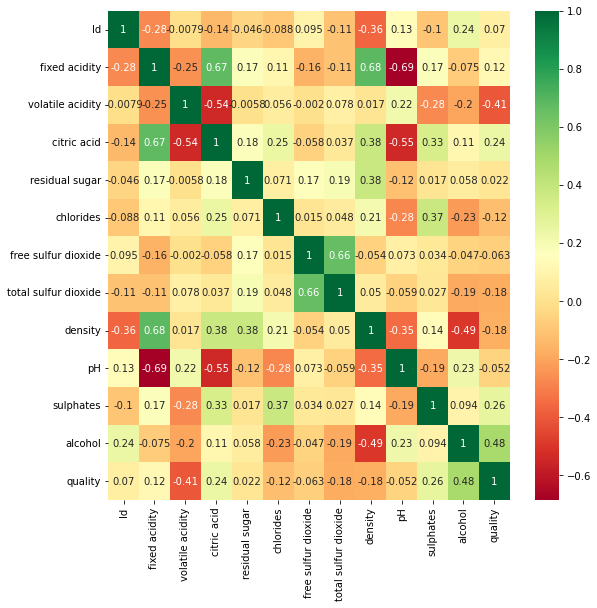

In [68]:
# Heat map for visualizing the correlation matrix

dt_features = dt_cor.index
plt.figure(figsize=(9,9))
g = sns.heatmap(dt_cor, annot = True, cmap='RdYlGn')

In [69]:
# Dropping all unimportant columns based on correlation values

dt_copy_fe = dt_copy.drop(['total sulfur dioxide','density','Id','residual sugar','free sulfur dioxide','pH', 'chlorides', 'fixed acidity'],axis=1)
dt_copy_fe

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.700,0.00,0.56,9.4,5
1,0.880,0.00,0.68,9.8,5
2,0.760,0.04,0.65,9.8,5
3,0.280,0.56,0.58,9.8,6
4,0.700,0.00,0.56,9.4,5
...,...,...,...,...,...
1592,0.510,0.13,0.75,11.0,6
1593,0.620,0.08,0.82,9.5,6
1594,0.600,0.08,0.58,10.5,5
1595,0.550,0.10,0.76,11.2,6


In [70]:
# Pair plot for showing a grid of corelation plots of all features
# sns.pairplot(dt_copy_fe)

# Train - test Split

In [71]:
def train_test(fraction, DataSet):
    training_data = DataSet.sample(frac= fraction, random_state=22)
    testing_data = DataSet.drop(training_data.index)
    return training_data, testing_data

In [72]:
train_dt, test_dt = train_test(0.7, dt_copy_fe)

In [73]:
test_dt

,volatile acidity,citric acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,5
8,0.58,0.02,0.57,9.5,7
10,0.58,0.08,0.54,9.2,5
22,0.43,0.21,0.91,9.5,5
25,0.39,0.16,0.56,9.3,5
...,...,...,...,...,...
1565,0.67,0.02,0.82,10.9,6
1572,0.69,0.32,0.51,9.5,5
1573,0.58,0.20,0.67,12.5,6
1583,0.46,0.29,0.62,9.8,5


In [74]:
X_train = train_dt.iloc[:,0:4].values
Y_train = train_dt["quality"].values
X_test = test_dt.iloc[:,0:4].values
Y_test = test_dt.iloc[:,4].values


In [75]:
Y_test

array([5, 7, 5, 5, 5, 5, 5, 6, 7, 6, 5, 4, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 4, 5, 5, 6, 6, 4, 5, 5, 6, 6, 5, 6, 5, 6,
       6, 6, 7, 6, 6, 5, 5, 5, 5, 8, 7, 7, 6, 5, 6, 5, 6, 7, 5, 6, 7, 6,
       7, 6, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6,
       6, 8, 5, 3, 5, 6, 6, 8, 7, 7, 7, 7, 5, 6, 3, 5, 6, 5, 6, 7, 5, 6,
       6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5,
       5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 4, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 7, 5, 6, 5,
       5, 7, 4, 5, 6, 5, 6, 7, 5, 4, 7, 6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 5,
       7, 4, 5, 6, 7, 7, 7, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 5, 7, 6,
       6, 5, 7, 6, 7, 7, 6, 5, 7, 5, 7, 6, 6, 5, 7, 6, 5, 7, 6, 6, 6, 6,
       6, 6, 6, 5, 8, 7, 6, 7, 6, 6, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 6, 4, 7, 6, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6,

In [76]:
# Feature scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Naive Bayes

In [89]:
# from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
classifier = GaussianNB()
classifiere = MultinomialNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [90]:
Y_pred  =  classifier.predict(X_test)

In [91]:
Y_pred

array([5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 6, 6, 3, 6, 5, 7, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 7, 7, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6,
       6, 7, 5, 7, 6, 5, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       6, 7, 5, 5, 5, 6, 6, 6, 7, 7, 6, 6, 6, 6, 5, 5, 7, 5, 5, 7, 6, 6,
       5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7,
       5, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 5, 6, 5,
       5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 7, 6, 7, 5, 5, 5, 7, 6, 6, 6, 5, 6,
       7, 5, 5, 7, 7, 6, 7, 6, 6, 6, 7, 6, 6, 6, 5, 6, 5, 5, 6, 5, 7, 5,
       7, 6, 5, 5, 6, 7, 6, 6, 6, 5, 6, 6, 7, 6, 7, 7, 5, 6, 6, 6, 5, 6,
       7, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 5, 5, 7, 6, 6, 7, 6, 6, 6, 5, 5,
       5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 5, 5, 6,
       6, 6, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6,

In [92]:
Y_test

array([5, 7, 5, 5, 5, 5, 5, 6, 7, 6, 5, 4, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 5, 4, 5, 5, 6, 6, 4, 5, 5, 6, 6, 5, 6, 5, 6,
       6, 6, 7, 6, 6, 5, 5, 5, 5, 8, 7, 7, 6, 5, 6, 5, 6, 7, 5, 6, 7, 6,
       7, 6, 5, 7, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 6,
       6, 8, 5, 3, 5, 6, 6, 8, 7, 7, 7, 7, 5, 6, 3, 5, 6, 5, 6, 7, 5, 6,
       6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5,
       5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 4, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 7, 7, 5, 6, 5,
       5, 7, 4, 5, 6, 5, 6, 7, 5, 4, 7, 6, 6, 5, 5, 6, 5, 7, 5, 5, 6, 5,
       7, 4, 5, 6, 7, 7, 7, 5, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 5, 7, 6,
       6, 5, 7, 6, 7, 7, 6, 5, 7, 5, 7, 6, 6, 5, 7, 6, 5, 7, 6, 6, 6, 6,
       6, 6, 6, 5, 8, 7, 6, 7, 6, 6, 6, 6, 5, 7, 6, 6, 6, 6, 5, 5, 6, 6,
       6, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 6, 4, 7, 6, 5, 5, 6, 6, 5, 5, 6,
       6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6,

In [93]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
ac = accuracy_score(Y_test,Y_pred)

In [94]:
ac

0.5451895043731778

In [83]:
# frac = 0.3, ac = 54.5%
# frac = 0.5, ac = 55.87%
# frac = 0.7, ac = 55.97%
# frac = 0.9, ac = 64.035%

# K-Nearest Neighbours


In [84]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=4)

In [85]:
Y_pred = knn.predict(X_test)

In [86]:
Y_pred

array([5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 6, 5, 7, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6,
       6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 5, 4, 5, 6, 5, 5, 5, 5, 5, 6,
       6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 6, 6,
       5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 7,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 4, 5, 5, 5, 5, 6, 6, 5, 5, 6, 7, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 7, 6, 7, 6, 5, 5, 7, 6, 6, 5, 5, 5,
       6, 5, 5, 7, 7, 6, 7, 5, 5, 5, 7, 5, 6, 6, 5, 5, 5, 6, 8, 6, 7, 6,
       6, 6, 6, 5, 5, 7, 6, 5, 6, 5, 6, 7, 6, 6, 6, 7, 5, 6, 6, 6, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6, 7, 6, 6, 6, 6, 6, 5, 5,
       5, 5, 7, 7, 6, 5, 6, 5, 5, 5, 5, 7, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 6, 6,

In [87]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.577259475218659


In [88]:
# n_neighbors= 2 , Accuracy = 51.60%
# n_neighbors= 4 , Accuracy = 55.69%
# n_neighbors= 6 , Accuracy = 55.10%